In [774]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime


In [775]:
df = pd.read_csv('data/archive/application_data.csv')
print(df.head())
print(df.describe())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [776]:
df.drop(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

In [777]:
df.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
         'NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_MOBIL',
         'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
         'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','NAME_TYPE_SUITE',
         'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'],axis=1,inplace=True)

In [778]:
print(df.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1         Cash loans          202500.0    406597.5   
1      100003       0         Cash loans          270000.0   1293502.5   
2      100004       0    Revolving loans           67500.0    135000.0   
3      100006       0         Cash loans          135000.0    312682.5   
4      100007       0         Cash loans          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE OCCUPATION_TYPE  \
0      24700.5         351000.0          Working        Laborers   
1      35698.5        1129500.0    State servant      Core staff   
2       6750.0         135000.0          Working        Laborers   
3      29686.5         297000.0          Working        Laborers   
4      21865.5         513000.0          Working      Core staff   

  WEEKDAY_APPR_PROCESS_START  ...  ELEVATORS_MEDI ENTRANCES_MEDI  \
0                  WEDNESDAY  ...            0.00         0.0690   
1         

In [779]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
307506,456251,0,Cash loans,157500.0,254700.0,27558.0,225000.0,Working,Sales staff,THURSDAY,...,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,0.2898
307507,456252,0,Cash loans,72000.0,269550.0,12001.5,225000.0,Pensioner,NaN,MONDAY,...,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,0.0214
307508,456253,0,Cash loans,153000.0,677664.0,29979.0,585000.0,Working,Managers,THURSDAY,...,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0000,0.0000,0.7970
307509,456254,1,Cash loans,171000.0,370107.0,20205.0,319500.0,Commercial associate,Laborers,WEDNESDAY,...,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN,0.0086
307510,456255,0,Cash loans,157500.0,675000.0,49117.5,675000.0,Commercial associate,Laborers,THURSDAY,...,0.08,0.0690,0.3750,NaN,NaN,NaN,0.0805,NaN,0.0000,0.0718


In [780]:
df.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG','NAME_CONTRACT_TYPE',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE','WEEKDAY_APPR_PROCESS_START',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI','OCCUPATION_TYPE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE'],axis=1,inplace=True)

In [781]:
print(df.columns)

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


In [782]:
print(df.describe())

          SK_ID_CURR         TARGET  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean   278180.518577       0.080729      1.687979e+05  5.990260e+05   
std    102790.175348       0.272419      2.371231e+05  4.024908e+05   
min    100002.000000       0.000000      2.565000e+04  4.500000e+04   
25%    189145.500000       0.000000      1.125000e+05  2.700000e+05   
50%    278202.000000       0.000000      1.471500e+05  5.135310e+05   
75%    367142.500000       0.000000      2.025000e+05  8.086500e+05   
max    456255.000000       1.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  
count  307499.000000     3.072330e+05            307511.000000  
mean    27108.573909     5.383962e+05                12.063419  
std     14493.737315     3.694465e+05                 3.265832  
min      1615.500000     4.050000e+04                 0.000000  
25%     16524.000000     2.385000e+

<AxesSubplot: ylabel='count'>

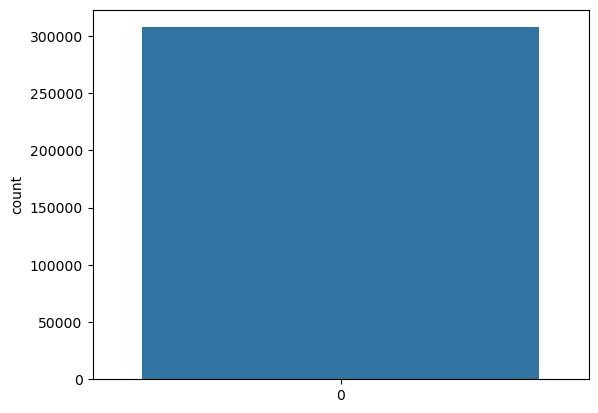

In [783]:
sns.countplot(df["TARGET"])

In [784]:
df.isnull().any().describe()

count         9
unique        2
top       False
freq          7
dtype: object

In [785]:
df.isnull().sum()

SK_ID_CURR                   0
TARGET                       0
AMT_INCOME_TOTAL             0
AMT_CREDIT                   0
AMT_ANNUITY                 12
AMT_GOODS_PRICE            278
NAME_INCOME_TYPE             0
HOUR_APPR_PROCESS_START      0
ORGANIZATION_TYPE            0
dtype: int64

In [786]:
def missing (df1):
    missing_number = df1.isnull().sum().sort_values(ascending=False)
    missing_percent = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [787]:
#fill null values with mean,median ,mode
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)

In [788]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY                0
AMT_GOODS_PRICE            0
NAME_INCOME_TYPE           0
HOUR_APPR_PROCESS_START    0
ORGANIZATION_TYPE          0
dtype: int64

In [789]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['NAME_INCOME_TYPE']= label_encoder.fit_transform(df['NAME_INCOME_TYPE'])
# Encode labels in column 'species'.
df['ORGANIZATION_TYPE']= label_encoder.fit_transform(df['ORGANIZATION_TYPE'])

print(df['ORGANIZATION_TYPE'])

print(df['NAME_INCOME_TYPE'])

0          5
1         39
2         11
3          5
4         37
          ..
307506    43
307507    57
307508    39
307509     3
307510     5
Name: ORGANIZATION_TYPE, Length: 307511, dtype: int64
0         7
1         4
2         7
3         7
4         7
         ..
307506    7
307507    3
307508    7
307509    1
307510    1
Name: NAME_INCOME_TYPE, Length: 307511, dtype: int64


In [790]:
limit = int(0.9*len(df))
train = df.loc[:limit]
val_test = df.loc[limit:]
val_test.reset_index(drop=True, inplace=True)
val_test_limit = int(0.5*len(val_test))
val = val_test.loc[:val_test_limit]
test = val_test.loc[val_test_limit:]

In [791]:
print("Number of fraudulent transactions in the validation set: {}".format(val["TARGET"].value_counts()[1]))
print("Number of fraudulent transactions in the test set: {}".format(test["TARGET"].value_counts()[1]))

Number of fraudulent transactions in the validation set: 1217
Number of fraudulent transactions in the test set: 1215


In [792]:
train_positive = train[train["TARGET"] == 1]
train_positive = pd.concat([train_positive] * int(len(train) / len(train_positive)), ignore_index=True)
noise = np.random.uniform(0.9, 1.1, train_positive.shape)
train_positive = train_positive.multiply(noise)
train_positive["TARGET"] = 1
train_extended = train.append(train_positive, ignore_index=True)
train_shuffled = train_extended.sample(frac=1, random_state=0).reset_index(drop=True)

/var/folders/l3/t92rj5x933jb95x9vpj5hs040000gn/T/ipykernel_10455/2933911752.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_extended = train.append(train_positive, ignore_index=True)


<AxesSubplot: ylabel='count'>

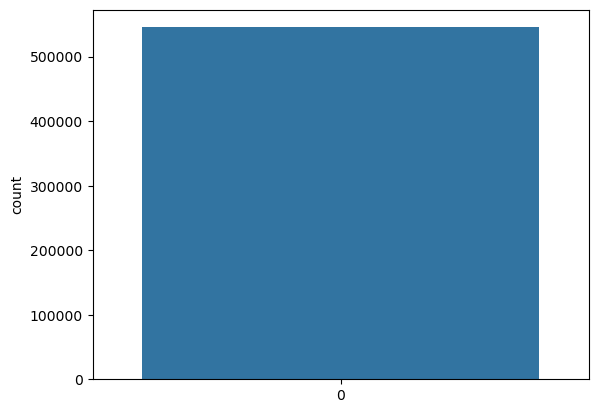

In [793]:
sns.countplot(train_shuffled["TARGET"])

In [794]:
X_train = train_shuffled.drop(labels=["TARGET"], axis=1)
Y_train = train_shuffled["TARGET"]
X_val = val.drop(labels=["TARGET"], axis=1)
Y_val = val["TARGET"]
X_test = test.drop(labels=["TARGET"], axis=1)
Y_test = test["TARGET"]

In [795]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_val[X_val.columns] = scaler.transform(X_val)
X_test[X_test.columns] = scaler.transform(X_test)

In [796]:
X_train.shape
X_test.shape

(15376, 8)

In [797]:
# model = Sequential()
# model.add(Dense(64, activation="relu", input_dim=(X_train.shape[1])))
# model.add(Dense(32, activation="relu"))
# model.add(Dense(16, activation="relu"))
# model.add(Dense(8, activation="relu"))
# model.add(Dense(4, activation="relu"))
# model.add(Dense(2, activation="relu"))
# model.add(Dense(1, activation="sigmoid"))
# model.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
# model.summary()
# history = model.fit(X_train, 
#                     Y_train, 
#                     epochs=50, 
#                     validation_data=(X_val, Y_val), 
#                     callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6)])

model = Sequential()
model.add(Dense(1024, activation="relu", input_dim=(X_train.shape[1])))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=Adam(0.0003), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()



Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 1024)              9216      
                                                                 
 dense_171 (Dense)           (None, 128)               131200    
                                                                 
 dense_172 (Dense)           (None, 64)                8256      
                                                                 
 dense_173 (Dense)           (None, 32)                2080      
                                                                 
 dense_174 (Dense)           (None, 16)                528       
                                                                 
 dense_175 (Dense)           (None, 8)                 136       
                                                                 
 dense_176 (Dense)           (None, 1)               

In [798]:
#tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)



In [799]:
# train
history = model.fit(X_train,
                    Y_train,
                    epochs=50,
                    batch_size=8192,
                    validation_data=(X_val, Y_val),
                    callbacks=[tensorboard_callback])

Epoch 1/50


2022-11-16 12:03:54.832244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - ETA: 0s - loss: 0.6890 - accuracy: 0.5565

2022-11-16 12:03:58.658778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - 5s 46ms/step - loss: 0.6890 - accuracy: 0.5565 - val_loss: 0.6736 - val_accuracy: 0.3996
Epoch 2/50
67/67 [==============================] - 2s 30ms/step - loss: 0.6800 - accuracy: 0.5834 - val_loss: 0.7002 - val_accuracy: 0.4440
Epoch 3/50
67/67 [==============================] - 1s 19ms/step - loss: 0.6667 - accuracy: 0.5935 - val_loss: 0.7175 - val_accuracy: 0.4328
Epoch 4/50
67/67 [==============================] - 1s 19ms/step - loss: 0.6520 - accuracy: 0.6107 - val_loss: 0.6649 - val_accuracy: 0.5197
Epoch 5/50
67/67 [==============================] - 1s 22ms/step - loss: 0.6302 - accuracy: 0.6347 - val_loss: 0.6841 - val_accuracy: 0.5029
Epoch 6/50
67/67 [==============================] - 1s 20ms/step - loss: 0.5959 - accuracy: 0.6695 - val_loss: 0.6393 - val_accuracy: 0.5911
Epoch 7/50
67/67 [==============================] - 1s 19ms/step - loss: 0.5469 - accuracy: 0.7067 - val_loss: 0.6643 - val_accuracy: 0.5532
Epoch 8/50
67/67 [======

In [800]:
test_results = model.evaluate(X_test, Y_test)
print("The model test accuracy is {}.".format(test_results[1]))

481/481 [==============================] - 3s 6ms/step - loss: 0.4628 - accuracy: 0.8058
The model test accuracy is 0.805801272392273.


In [801]:
predictions = (model.predict(X_test)>0.5).astype("int32")
ap_score = average_precision_score(Y_test, predictions)
print("The model test average precision score is {}.".format(ap_score))

 37/481 [=>............................] - ETA: 1s

2022-11-16 12:05:01.826975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


481/481 [==============================] - 1s 3ms/step
The model test average precision score is 0.08609540140508419.


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual Negative'), Text(0, 1.5, 'Actual Positive')])

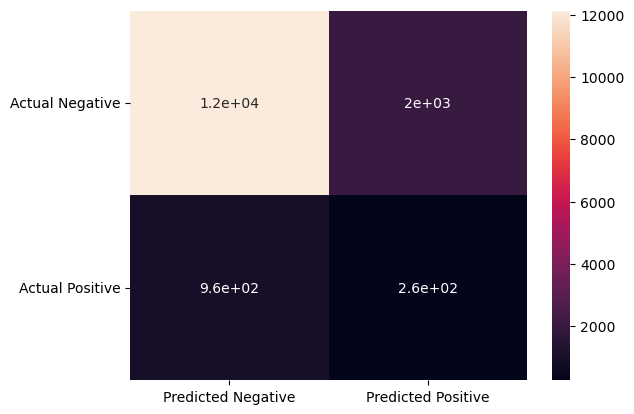

In [802]:
confusion = pd.DataFrame(confusion_matrix(Y_test, predictions))
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
sns.heatmap(confusion, annot=True)
plt.yticks(rotation=0)

In [803]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     14161
           1       0.11      0.21      0.15      1215

    accuracy                           0.81     15376
   macro avg       0.52      0.53      0.52     15376
weighted avg       0.86      0.81      0.83     15376

